In [3]:
import pandas as pd
import numpy as np
import os

from tqdm.notebook import tqdm

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

import json

In [28]:
ranking_df = pd.read_csv(os.path.join('data','ranking_all_2017_2021.csv'), parse_dates=['Date','release_date'], index_col=0)

In [26]:
def print_song_info(song_id_):
    info_= ranking_df[ranking_df['song_id']==song_id_][['Track Name', 'Artist']].values[0]
    print(f'Track name: {info_[0]}. Artist: {info_[1]}')

In [6]:
ranking_df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,song_id,release_date
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,Ecuador,3AEZUABDXNtecAOSC1qTfo,2017-01-01
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,Ecuador,6mICuAdrwEjh6Y6lroV2Kg,2017-01-01
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,Ecuador,3QwBODjSEzelZyVjxPOHdq,2017-01-01
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,Ecuador,7DM4BPaS7uofFul3ywMe46,2017-01-01
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,Ecuador,6rQSrBHf7HlZjtcMZ4S4bO,2017-01-01


Time period covered by the dataset

In [7]:
ranking_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19724913 entries, 0 to 34399
Data columns (total 9 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Position      int64         
 1   Track Name    object        
 2   Artist        object        
 3   Streams       int64         
 4   URL           object        
 5   Date          datetime64[ns]
 6   Region        object        
 7   song_id       object        
 8   release_date  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 1.5+ GB


Number of total entries in the dataset

In [8]:
ranking_df.shape

(19724913, 9)

Number of songs

In [9]:
n_total_songs = ranking_df['song_id'].nunique()

In [10]:
print(f'The total number of songs is: {n_total_songs}')
print(f'The total number of countries is: {ranking_df.Region.nunique()}')

The total number of songs is: 99651
The total number of countries is: 54


In [11]:
s=ranking_df.groupby(['song_id','Region'])['Date'].min().to_frame()

In [12]:
s

Date
song_id                Region              
000RW47rhEkSqjgTrZx7YX Brazil    2021-06-06
000xQL6tZNLJzIrtIgxqSl Argentina 2017-04-08
                       Australia 2017-03-24
                       Austria   2017-03-24
                       Belgium   2017-03-24
...                                     ...
7zz2EAAis1zHGVBvtLJ8ZT Indonesia 2018-04-20
7zzI3SbctTJN6wDerZNZCD Turkey    2019-07-26
7zzU5vd1GrHpNjwq3HpIe3 France    2020-10-16
7zzbnhCpuuHOCrhBGvgwpp Lithuania 2021-05-21
7zzhknA0A39TH81meuX7WA France    2019-10-04

[297142 rows x 1 columns]

## Visualization of the dataset

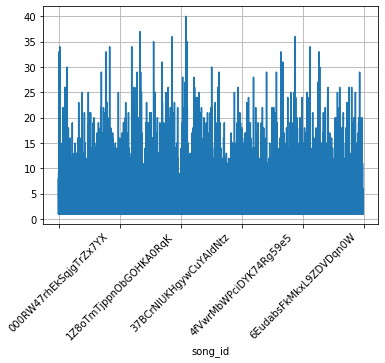

In [13]:
days_per_song= s.groupby(['song_id'])['Date'].nunique()
days_per_song.plot(grid=True, rot=45);

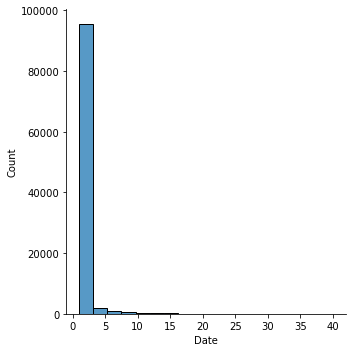

In [14]:
sns.displot(days_per_song);

In [35]:
release_ranking_df = ranking_df[ranking_df['Date']== ranking_df['release_date']]
release_ranking_df=release_ranking_df.drop_duplicates('song_id release_date Region'.split())
num_initial_lists_df = release_ranking_df.groupby('song_id').size().to_frame()
num_initial_lists_df.head()

,0
song_id,
000RW47rhEkSqjgTrZx7YX,1
000xQL6tZNLJzIrtIgxqSl,39
000xYdQfIZ4pDmBGzQalKU,1
001b8t3bYPfnabpjpfG1Y4,1
001cKCt7jEOzXjqgkn9DQf,1


In [36]:
release_ranking_df[release_ranking_df['song_id']=='000xQL6tZNLJzIrtIgxqSl']

,Position,Track Name,Artist,Streams,URL,Date,Region,song_id,release_date
16562,163,Still Got Time,ZAYN,1629,https://open.spotify.com/track/000xQL6tZNLJzIr...,2017-03-24,Ecuador,000xQL6tZNLJzIrtIgxqSl,2017-03-24
90738,139,Still Got Time,ZAYN,26050,https://open.spotify.com/track/000xQL6tZNLJzIr...,2017-03-24,France,000xQL6tZNLJzIrtIgxqSl,2017-03-24
239068,69,Still Got Time,ZAYN,15219,https://open.spotify.com/track/000xQL6tZNLJzIr...,2017-03-24,Finland,000xQL6tZNLJzIrtIgxqSl,2017-03-24
313253,54,Still Got Time,ZAYN,37752,https://open.spotify.com/track/000xQL6tZNLJzIr...,2017-03-24,Norway,000xQL6tZNLJzIrtIgxqSl,2017-03-24
387460,61,Still Got Time,ZAYN,26475,https://open.spotify.com/track/000xQL6tZNLJzIr...,2017-03-24,Italy,000xQL6tZNLJzIrtIgxqSl,2017-03-24
449503,45,Still Got Time,ZAYN,1207,https://open.spotify.com/track/000xQL6tZNLJzIr...,2017-03-24,Lithuania,000xQL6tZNLJzIrtIgxqSl,2017-03-24
478507,109,Still Got Time,ZAYN,28595,https://open.spotify.com/track/000xQL6tZNLJzIr...,2017-03-24,Philippines,000xQL6tZNLJzIrtIgxqSl,2017-03-24
552654,56,Still Got Time,ZAYN,6103,https://open.spotify.com/track/000xQL6tZNLJzIr...,2017-03-24,Taiwan,000xQL6tZNLJzIrtIgxqSl,2017-03-24
626873,75,Still Got Time,ZAYN,10837,https://open.spotify.com/track/000xQL6tZNLJzIr...,2017-03-24,NewZealand,000xQL6tZNLJzIrtIgxqSl,2017-03-24
713911,90,Still Got Time,ZAYN,7227,https://open.spotify.com/track/000xQL6tZNLJzIr...,2017-03-24,Turkey,000xQL6tZNLJzIrtIgxqSl,2017-03-24


In [37]:
len(release_ranking_df[release_ranking_df['song_id']=='000xQL6tZNLJzIrtIgxqSl']['Region'].to_list())

39

In [46]:
num_initial_lists_df[0].value_counts(bins=10)

(0.946, 6.3]    94287
(6.3, 11.6]      1678
(11.6, 16.9]     1276
(16.9, 22.2]      743
(22.2, 27.5]      502
(27.5, 32.8]      379
(32.8, 38.1]      274
(43.4, 48.7]      250
(38.1, 43.4]      172
(48.7, 54.0]       90
Name: 0, dtype: int64

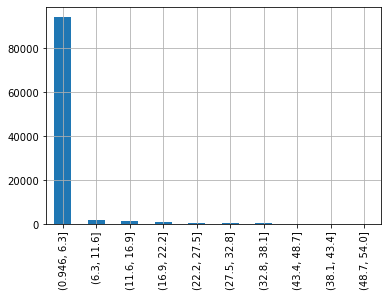

In [43]:
num_initial_lists_df[0].value_counts(bins=10).plot(kind='bar', grid=True)

### Remove songs appearing in duplicate countries initially

In [ ]:
def remove_duplicate_songs_fn(ranking_df_):
    release_ranking_df = ranking_df_[ranking_df_['Date']== ranking_df_['release_date']]
    num_initial_lists_df = release_ranking_df.groupby('song_id').size().to_frame()
    #print(num_initial_lists_df)
    num_initial_lists_df.columns =['num_lists']
    songs_with_one_initial_list = num_initial_lists_df[num_initial_lists_df['num_lists']==1].index.to_list()
    #print(songs_with_one_initial_list)
    return ranking_df_[ranking_df_['song_id'].isin(songs_with_one_initial_list)]   

In [ ]:
clean_ranking_df = remove_duplicate_songs_fn(ranking_df)

In [ ]:
clean_ranking_df.head()

In [ ]:
clean_ranking_df.info()

In [ ]:
clean_ranking_df.to_csv(os.path.join('data', 'clean_ranking_2017_2021.csv'))

### Generate songs' timeseries

In [ ]:
def generate_songs_timeseries_fin(clean_ranking_df_):
    num_countries_lst = []
    total_countries_per_song = {}
    songs_ids = clean_ranking_df_['song_id'].unique()
    
    
    for song_id in tqdm(clean_ranking_df_['song_id'].unique()):
        song_df =clean_ranking_df_[clean_ranking_df_['song_id']==song_id]
        song_dates = song_df['Date'].unique()
        song_dates.sort()
        num_day = 1
        for d in song_dates:
            song_date_df = song_df[song_df['Date']==d]
            
            current_countries = set(song_date_df['Region'].unique())
            total_countries =total_countries_per_song.get(song_id,set())
            
            in_countries = current_countries - total_countries
            out_countries = total_countries- current_countries


            total_countries=total_countries.union(current_countries)
            total_countries_per_song[song_id]= total_countries


            num_countries_lst.append((song_id,num_day,len(total_countries), len(current_countries), len(in_countries), len(out_countries)))
            
            #print(d, num_countries)
            #num_countries_lst.append((song_id,num_day,num_countries))
            num_day +=1
    num_countries_df_ = pd.DataFrame.from_records(num_countries_lst, columns='song_id num_day total_countries current_countries inc dec'.split())
    num_countries_df_.to_csv(os.path.join('data', 'raw_songs_timeseries.csv'))
    return num_countries_df_

In [ ]:
songs_ts = generate_songs_timeseries_fin(clean_ranking_df)

"""
num_countries_lst = []
songs_ids = clean_ranking_df['song_id'].unique()
for song_id in tqdm(clean_ranking_df['song_id'].unique()):
    song_df =clean_ranking_df[clean_ranking_df['song_id']==song_id]
    song_dates = song_df['Date'].unique()
    song_dates.sort()
    num_day = 1
    for d in song_dates:
        song_date_df = song_df[song_df['Date']==d]
        num_countries = song_date_df['Region'].nunique()
        #print(d, num_countries)
        num_countries_lst.append((song_id,num_day,num_countries))
        num_day +=1
num_countries_df = pd.DataFrame.from_records(num_countries_lst, columns='song_id num_day num_countries'.split())
num_countries_df.to_csv(os.path.join('data', 'num_countries.csv'))
"""

In [ ]:
songs_ts['dec'].value_counts(bins=10)

In [ ]:
songs_ts.info()

### Remove abnormal increments

In [ ]:
songs_ts['inc'].value_counts(bins=5)

In [ ]:
songs_to_remove= songs_ts[songs_ts['inc']>10]['song_id'].unique()

In [ ]:
songs_to_remove

In [ ]:
songs_clean_ts= songs_ts[~songs_ts['song_id'].isin(songs_to_remove)]

### Remove songs in only one country

In [ ]:
total_countries_per_song_df = songs_clean_ts.groupby('song_id')['total_countries'].max().to_frame()
total_countries_per_song_df.head()

In [ ]:
total_countries_per_song_df['total_countries'].value_counts()

In [ ]:
songs_to_keep= total_countries_per_song_df[total_countries_per_song_df['total_countries']>1].index.to_list()

In [ ]:
songs_clean_ts= songs_clean_ts[songs_clean_ts['song_id'].isin(songs_to_keep)]

In [ ]:
songs_clean_ts.head()

In [ ]:
songs_clean_ts.info()

In [ ]:
print(f'Num of songs: {songs_clean_ts.song_id.nunique()}, ({round(songs_clean_ts.song_id.nunique()/n_total_songs,3)} %)')
print(f'Max. total number of countries for a song: {songs_clean_ts.total_countries.max()}')
print(f'Min. total number of countries for a song: {songs_clean_ts.total_countries.min()}')
print(f'Max. current number of countries for a song: {songs_clean_ts.current_countries.max()}')
print(f'Max. increment for a song: {songs_clean_ts.inc.max()}')
print(f'Max. decrement for a song: {songs_clean_ts.dec.max()}')

In [ ]:
sns.distplot(songs_clean_ts['inc']);

In [ ]:
songs_clean_ts[songs_clean_ts['inc']>=10]

In [ ]:
print_song_info('152lZdxL1OR0ZMW6KquMif')

In [ ]:
print_song_info('5yuShbu70mtHXY0yLzCQLQ')

### Plot songs' timeseries

In [5]:
def plot_all_songs_evol_fn(songs_ts_, col_name):
    ax= None
    song_ids=songs_ts_['song_id'].sample(50)
    for song_id in song_ids:
        if ax is None:
            ax=songs_ts_[songs_ts_['song_id']==song_id].plot(x='num_day',y=col_name, legend=False)
        else:
            songs_ts_[songs_ts_['song_id']==song_id].plot(ax=ax,x='num_day',y=col_name, legend=False)


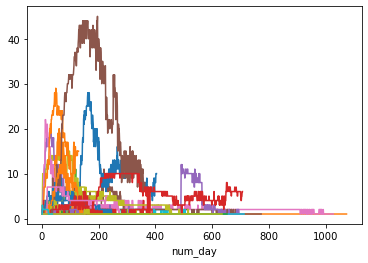

In [6]:
plot_all_songs_evol_fn(songs_clean_ts, 'current_countries')

In [21]:
def plot_song_evol_fn(ts, song_id_):
    ax=ts[ts['song_id']==song_id_].plot(x='num_day',y='total_countries', grid=True, legend=False);
    #ts[ts['song_id']==song_id_].plot(ax=ax,x='num_day',y='current_countries', label='current',grid=True);
    ax.set_ylabel('Number of total countries', fontsize=14)
    ax.set_xlabel('Number of days', fontsize=14)
    plt.tight_layout()
    plt.savefig(os.path.join('figs', f'{song_id_}_timeline.png'))
    #ts[ts['song_id']==song_id_].plot(ax=ax,x='num_day',y='inc', label='increment',grid=True);
    #ts[ts['song_id']==song_id_].plot(ax=ax,x='num_day',y='dec', label='decrement',grid=True);

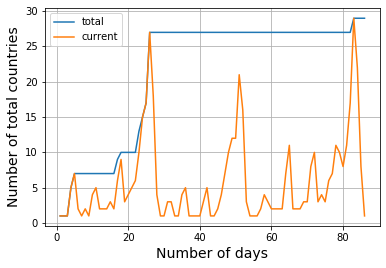

In [17]:
plot_song_evol_fn(songs_clean_ts, '1VuAamHM7P3VQQEXYGG3Uu')

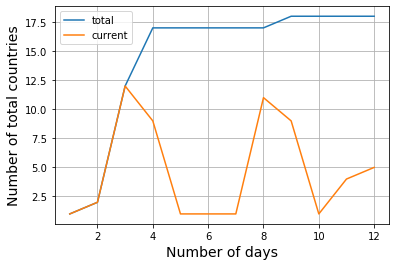

In [18]:
plot_song_evol_fn(songs_clean_ts, '1moEucbMhmAK6KVPoNw6ms')

In [ ]:
songs_clean_ts.to_csv(os.path.join('data', 'songs_timeseries_2017_2021.csv'))

In [ ]:
max_days = 40

In [ ]:
num_countries_growing_lite_df = num_countries_growing_df[num_countries_growing_df['num_day']<max_days]

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(16, 6))
ax=sns.boxplot(x='num_day', y='num_countries', data=num_countries_growing_lite_df, showfliers=False);
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);
#ax.fig.set_size_inches(15,15)


In [ ]:
num_countries_growing_df

In [ ]:
n_countries_diff_df = num_countries_growing_df.groupby('song_id').diff()
n_countries_diff_df['num_day']= num_countries_growing_df['num_day']
n_countries_diff_df

In [ ]:
n_countries_diff_lite_df = n_countries_diff_df[n_countries_diff_df['num_day']<max_days]
sns.set_style('whitegrid')
plt.figure(figsize=(16, 6))
ax=sns.boxplot(x='num_day', y='num_countries', data=n_countries_diff_lite_df);
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

### Study distritubion of new countries per date

In [4]:
songs_clean_ts = pd.read_csv(os.path.join('data', 'songs_timeseries_2017_2021.csv'), index_col=0)

In [5]:
songs_clean_ts.head()

,song_id,num_day,total_countries,current_countries,inc,dec
0,4O4Z8VFczL8MxIOmqVWc1b,1,1,1,1,0
1,4O4Z8VFczL8MxIOmqVWc1b,2,2,1,1,1
2,4O4Z8VFczL8MxIOmqVWc1b,3,2,1,0,1
3,4O4Z8VFczL8MxIOmqVWc1b,4,2,1,0,1
4,4O4Z8VFczL8MxIOmqVWc1b,5,2,1,0,1


In [34]:
songs_clean_ts[songs_clean_ts['total_countries']==49]

,song_id,num_day,total_countries,current_countries,inc,dec
9313,0E9ZjEAyAwOXZ7wJC0PD33,963,49,3,1,46
9314,0E9ZjEAyAwOXZ7wJC0PD33,964,49,1,0,48
9315,0E9ZjEAyAwOXZ7wJC0PD33,965,49,1,0,48
9316,0E9ZjEAyAwOXZ7wJC0PD33,966,49,1,0,48
9317,0E9ZjEAyAwOXZ7wJC0PD33,967,49,3,0,46
...,...,...,...,...,...,...
2654896,4gvrJnKCKIPiacNsWVQwEU,71,49,43,0,6
2654897,4gvrJnKCKIPiacNsWVQwEU,72,49,41,0,8
2654898,4gvrJnKCKIPiacNsWVQwEU,73,49,41,0,8
2654899,4gvrJnKCKIPiacNsWVQwEU,74,49,41,0,8


In [13]:
songs_clean_ts.sort_values('total_countries')

,song_id,num_day,total_countries,current_countries,inc,dec
0,4O4Z8VFczL8MxIOmqVWc1b,1,1,1,1,0
1068068,2GggG2lQVYuus2aeAybe8M,84,1,1,0,0
1068069,2GggG2lQVYuus2aeAybe8M,85,1,1,0,0
1068070,2GggG2lQVYuus2aeAybe8M,86,1,1,0,0
1068071,2GggG2lQVYuus2aeAybe8M,87,1,1,0,0
...,...,...,...,...,...,...
2654056,0eu4C55hL6x29mmeAjytzC,68,53,51,0,2
2654057,0eu4C55hL6x29mmeAjytzC,69,53,48,0,5
2654058,0eu4C55hL6x29mmeAjytzC,70,53,47,0,6
2654048,0eu4C55hL6x29mmeAjytzC,60,53,50,0,3


In [6]:
songs_clean_ts.loc[songs_clean_ts['total_countries'].idxmax()]

song_id              1rgnBhdG2JDFTbYkYRZAku
num_day                                 738
total_countries                          53
current_countries                        31
inc                                       1
dec                                      22
Name: 38473, dtype: object

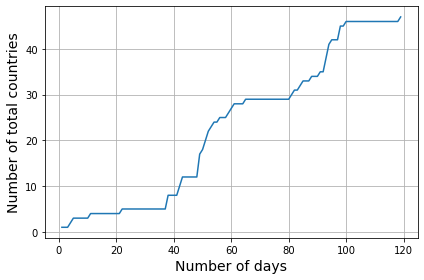

In [22]:
plot_song_evol_fn(songs_clean_ts[songs_clean_ts['num_day']<120], '1rgnBhdG2JDFTbYkYRZAku')

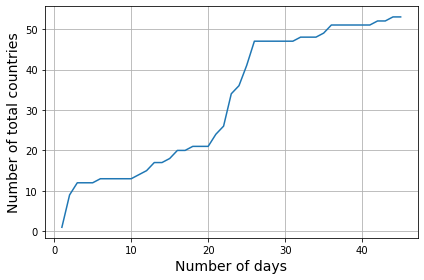

In [23]:
plot_song_evol_fn(songs_clean_ts[songs_clean_ts['num_day']<46], '0eu4C55hL6x29mmeAjytzC')

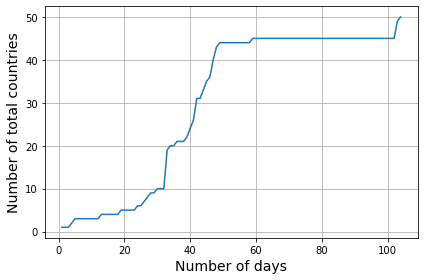

In [24]:
plot_song_evol_fn(songs_clean_ts[songs_clean_ts['num_day']<105], '1v1oIWf2Xgh54kIWuKsDf6')

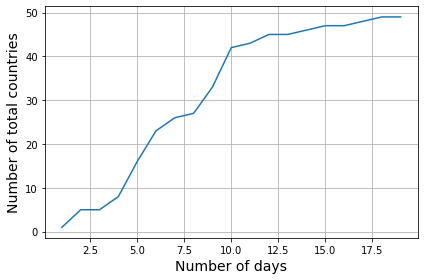

In [38]:
plot_song_evol_fn(songs_clean_ts[songs_clean_ts['num_day']<20], '4gvrJnKCKIPiacNsWVQwEU')

In [36]:
print_song_info('1rgnBhdG2JDFTbYkYRZAku')
print_song_info('0eu4C55hL6x29mmeAjytzC')
print_song_info('1v1oIWf2Xgh54kIWuKsDf6')
print_song_info('4gvrJnKCKIPiacNsWVQwEU')

Track name: Dance Monkey. Artist: Tones And I
Track name: Life Goes On. Artist: Oliver Tree
Track name: Runaway. Artist: AURORA
Track name: love nwantiti (feat. Dj Yo! & AX'EL) - Remix. Artist: CKay


In [5]:
min_day_df = songs_clean_ts.groupby('song_id total_countries'.split()).agg({'num_day':min})
min_day_df = min_day_df.reset_index()
min_day_df.head()

,song_id,total_countries,num_day
0,007ogFejDqJKzEXDUDF8Nf,1,1
1,007ogFejDqJKzEXDUDF8Nf,2,6
2,00NpdPvXFERf1USRAcHkT3,1,1
3,00NpdPvXFERf1USRAcHkT3,2,2
4,00WvmRXTkPBZNhhRK3xfdy,1,1


In [6]:
total_countries_range = min_day_df['total_countries'].unique()
total_countries_range

array([ 1,  2,  3,  4,  5,  6,  7,  9, 11, 15, 18, 26, 27, 28, 29, 30, 32,
       35, 39, 40,  8, 21, 22, 23, 13, 14, 16, 24, 25, 12, 10, 17, 19, 20,
       31, 41, 42, 44, 45, 46, 47, 48, 49, 34, 36, 51, 52, 53, 37, 38, 50,
       33, 43], dtype=int64)

In [7]:
dict_={}
for c in total_countries_range:
    days_= min_day_df[min_day_df['total_countries']==c]['num_day'].values
    dict_[c]= days_

In [13]:
dict_

{1: array([1, 1, 1, ..., 1, 1, 1], dtype=int64),
 2: array([6, 2, 6, ..., 2, 3, 4], dtype=int64),
 3: array([ 7, 34,  9, ..., 19, 23,  5], dtype=int64),
 4: array([ 4,  2, 16, ...,  2, 32, 26], dtype=int64),
 5: array([  18,   15,   49,    5,   34,    2,  129,   13,   87,    5,  102,
          18,    8,   17,   44,   17,   19,    7,   20,    7,   12,    6,
          44,    2,    3,   13,    2,   49,  124,  591,   16,    4,    4,
           8,   82,  118,   62,   11,   26,    5,   45,   10,   12,  253,
          27,   63,  127,   52,   11,    6,   20,   28,  116,  197,   16,
          18,   32,   32,    3,   40,   38,   13,    2,    4,    2,    7,
          20,  199,    8,   25,   26,  285,    8,   32,   53,   75,    2,
          94,   18,  104,   18,    2,   42,    8,    8,   18,    2,    7,
          16,    7,    5,    4,    3,    8,    4,   16,   73,   13,    4,
          89,    2,   11,  151,   29,   14,   46,  169,   11,   24,   27,
          20,   49,   99,    8,  154,    8,   14,

In [26]:
days_df= pd.DataFrame.from_dict(dict_,orient='index').sort_index().T

In [27]:
days_df.columns

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53],
           dtype='int64')

In [35]:
np.arange(1,49)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

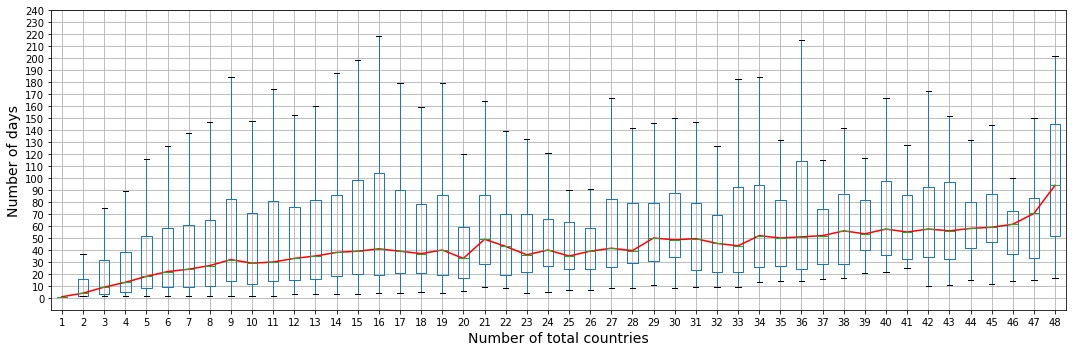

In [38]:
ax=days_df[np.arange(1,49)].boxplot(figsize=(15,5), grid=True, showfliers=False);
days_df[np.arange(1,49)].median(axis=0).plot(ax=ax, color='red', grid=True);
ax.set_xlabel('Number of total countries', fontsize=14)
ax.set_ylabel('Number of days', fontsize=14)
ax.set_yticks(np.arange(0,250,10))
plt.tight_layout()

In [12]:
 print("That's all folks")

That's all folks


----------------------------------------------------------------------------